## Credit Suisse

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
missing_values = ["n/a", "na", "--", ' ', "NAN"]
data = pd.read_csv("../resources/Data.csv", na_values = missing_values)

In [3]:
data.head()

,QTR,AC6,AC6.1,AC6.2,AC6.3,AC5,AC5.1,AC6.4,AC6.5,AC6.6,...,AC6.16,AC6.17,AC6.18,AC6.19,AC6.20,AC7.4,AC7.5,AC2.5,AC2.6,Status
0,NaN,V61,V62,V63,V64,V521,V56,V65,V66,V67,...,V621,V619,V614,V615,V613,V75,V76,V24,V21,NaN
1,NaN,NOTCHECKED,NOTCHECKED,CHECKED,NOTCHECKED,NOTCHECKED,NOTCHECKED,NOTCHECKED,NOTCHECKED,NOTCHECKED,...,NOTCHECKED,NOTCHECKED,NOTCHECKED,NOTCHECKED,CHECKED,NOTCHECKED,CHECKED,CHECKED,NOTCHECKED,NaN
2,2007Q1,14.83701892,99.39895748,62.94080546,101.764,1.674048473,3.82953486,1.376969231,1.734046154,1.734892308,...,2.882427354,2.574383623,4.151536606,1.851110209,0.293229125,92.44514042,2852.292845,192.4493716,6466.172493,NOTCHECKED
3,2007Q2,14.90709017,91.33259965,58.44709848,101.1369231,3.004369667,3.82953486,1.400923077,1.547769231,1.698153846,...,2.968603516,2.680464049,4.151519695,1.851584132,0.293911596,91.0359477,2877.140392,202.1334248,6720.868911,NOTCHECKED
4,2007Q3,23.21522878,117.8079253,87.46058542,98.30738462,2.909346725,3.342410308,2.126230769,1.973061538,2.402969231,...,2.977815816,2.701522102,4.228532862,1.869284404,0.291331291,108.3190147,2668.667999,201.2074925,7548.173885,NOTCHECKED


In [4]:
data.shape

(50, 78)

In [5]:
col_names = []
for i in data.columns:
    col_names.append(i)
variables = sorted(col_names)[:76]
print(variables)

['AC1', 'AC1.1', 'AC1.2', 'AC1.3', 'AC1.4', 'AC2', 'AC2.1', 'AC2.2', 'AC2.3', 'AC2.4', 'AC2.5', 'AC2.6', 'AC3', 'AC3.1', 'AC3.2', 'AC3.3', 'AC3.4', 'AC4', 'AC4.1', 'AC4.2', 'AC4.3', 'AC4.4', 'AC4.5', 'AC5', 'AC5.1', 'AC5.10', 'AC5.11', 'AC5.12', 'AC5.13', 'AC5.14', 'AC5.15', 'AC5.16', 'AC5.17', 'AC5.18', 'AC5.2', 'AC5.3', 'AC5.4', 'AC5.5', 'AC5.6', 'AC5.7', 'AC5.8', 'AC5.9', 'AC6', 'AC6.1', 'AC6.10', 'AC6.11', 'AC6.12', 'AC6.13', 'AC6.14', 'AC6.15', 'AC6.16', 'AC6.17', 'AC6.18', 'AC6.19', 'AC6.2', 'AC6.20', 'AC6.3', 'AC6.4', 'AC6.5', 'AC6.6', 'AC6.7', 'AC6.8', 'AC6.9', 'AC7', 'AC7.1', 'AC7.2', 'AC7.3', 'AC7.4', 'AC7.5', 'AC8', 'AC8.1', 'AC8.2', 'AC8.3', 'AC8.4', 'AC8.5', 'AC8.6']


In [6]:
# Dictionary storing the data type (Checked or Not-checked)
data_type = {}
for i in variables:
    data_type[i] = data[i][1]

In [7]:
# Filters the data for the missing values (for e.g. ' ', NAN, na, n/a)
def Isnan(x):
    x = np.array(data[x][2:])
    x_cleaned = [float(i) for i in x if str(i) != 'nan']
    if len(x) == len(x_cleaned):
        return("No missing values found")
    else:
        return("missing values found")

In [8]:
# Filters the data for the missing values (for e.g. ' ', NAN, na, n/a)
def Cleaner(x):
    x = np.array(data[x][2:])
    x_cleaned = [float(i) for i in x if str(i) != 'nan']
    return x_cleaned

In [9]:
# checked & not_checked are list storing checked & not_checked variables respestively
checked = []
not_checked = []
for i in variables:
    if data_type[i] == 'CHECKED':
        checked.append(i)
    else:
        not_checked.append(i)

In [10]:
not_checked_no_missingvalue = []
for i in not_checked:
    if Isnan(i) == 'No missing values found':
        not_checked_no_missingvalue.append(i)

In [11]:
len(checked),len(not_checked)

(9, 67)

In [12]:
result = pd.DataFrame(columns = variables)
for i in variables:
    result[i] = list(np.arange(1,49))
result.insert(0, "QTR", list(data['QTR'][2:]),True)     

## Outlier detection with Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn. Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods. See User Guide <outlier_detection>: for details on the difference between outlier detection and novelty detection and how to use LOF for novelty detection.

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [14]:
def LOF_values(X):
    X = Cleaner(str(X))
    X = list(zip(X,X))
    X = np.array(X)
    clf = LocalOutlierFactor(n_neighbors=20, algorithm = 'auto')
    y_pred = clf.fit_predict(X)
    return(y_pred)

In [15]:
# Storing the results in results:
for i in not_checked_no_missingvalue:
    result[i] = list(LOF_values(i))

In [16]:
result.head()

,QTR,AC1,AC1.1,AC1.2,AC1.3,AC1.4,AC2,AC2.1,AC2.2,AC2.3,...,AC7.3,AC7.4,AC7.5,AC8,AC8.1,AC8.2,AC8.3,AC8.4,AC8.5,AC8.6
0,2007Q1,1,1,1,1,1,-1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2007Q2,1,1,1,1,2,-1,1,1,2,...,1,2,2,2,2,1,1,1,1,1
2,2007Q3,1,1,1,1,3,-1,1,1,3,...,1,3,3,3,3,1,1,1,1,1
3,2007Q4,1,1,1,1,4,-1,1,1,4,...,1,4,4,4,4,1,1,-1,1,1
4,2008Q1,1,1,1,1,5,1,1,1,5,...,1,5,5,5,5,1,-1,-1,-1,1


In [17]:
col_with_missingval = []
for i in variables:
    if Isnan(i) == "missing values found":
        col_with_missingval.append(i)

In [128]:
missing_value_df = pd.DataFrame(data[i][2:] for i in col_with_missingval)
missing_value_df = missing_value_df.transpose()
missing_value_df = missing_value_df.astype(float)
missing_value_df = missing_value_df.interpolate()

In [142]:
def LOF_missing_value(X):
    X = list(zip(X,X))
    X = np.array(X)
    clf = LocalOutlierFactor(n_neighbors=20, algorithm = 'auto')
    y_pred = clf.fit_predict(X)
    return(y_pred)

In [143]:
for i in col_with_missingval:
    result[i] = list(LOF_missing_value(missing_value_df[i]))

In [153]:
import matplotlib.pyplot as plt

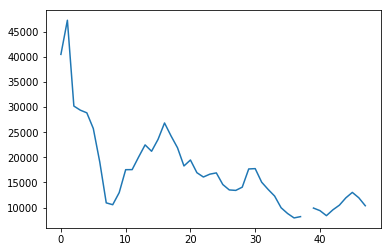

In [156]:
plt.plot(list(map(float,data['AC1.4'][2:])))

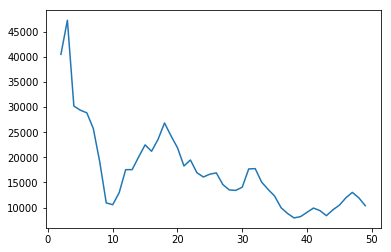

In [157]:
plt.plot(missing_value_df['AC1.4'])